Import Packages

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

In [2]:
# Load the MNIST dataset and split it into training and testing sets
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize pixel values to the range [0, 1]
train_images = train_images.astype("float32") / 255.0
test_images = test_images.astype("float32") / 255.0

# Reshape the input data to have a single channel (grayscale)
train_images = train_images.reshape((-1, 28, 28, 1))
test_images = test_images.reshape((-1, 28, 28, 1))

# Convert the labels to one-hot encoded vectors
train_labels = keras.utils.to_categorical(train_labels)
test_labels = keras.utils.to_categorical(test_labels)

11490434/11490434 [==============================] - 0s 0us/step


/usr/local/lib/python3.10/dist-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


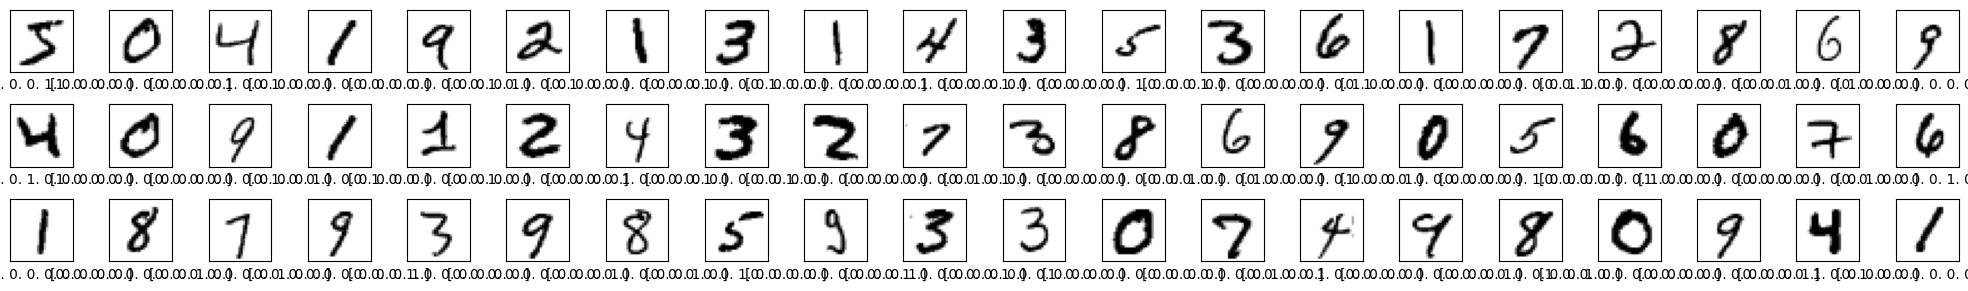

In [8]:
# Constants for plotting
ROWS = 3
COLS = 20
current_index = 0

# Set up the figure for displaying images
plt.figure(figsize=(20, 3))

# Iterate through the specified number of rows and columns
for row in range(ROWS):
    for col in range(COLS):
        # Plot the current image
        plt.subplot(ROWS, COLS, current_index + 1)
        plt.imshow(train_images[current_index], cmap=plt.cm.gray_r)

        # Remove x and y ticks
        plt.xticks([])
        plt.yticks([])
        plt.xlabel(train_labels[current_index])
        current_index += 1

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [9]:
def build_model():
    # Define a sequential model
    model = tf.keras.Sequential([
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=(28, 28, 1)),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation="relu"),
        layers.Dense(10, activation="softmax"),
    ])
    return model

# Build the model using the defined function
model = build_model()

In [10]:
# Compile the model with SGD optimizer
model_sgd = build_model()
model_sgd.compile(
    loss="categorical_crossentropy",
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
    metrics=["accuracy"],
)

In [11]:
# Compile the model with Adam optimizer
model_adam = build_model()
model_adam.compile(
    loss="categorical_crossentropy",
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"],
)

In [12]:
# Compile the model with RMSprop optimizer
model_rmsprop = build_model()
model_rmsprop.compile(
    loss="categorical_crossentropy",
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
    metrics=["accuracy"],
)

In [14]:
# Train the models and record their training and validation metrics
history_sgd = model_sgd.fit(train_images, train_labels, epochs=7, batch_size=64, validation_split=0.2)
history_adam = model_adam.fit(train_images, train_labels, epochs=7, batch_size=64, validation_split=0.2)
history_rmsprop = model_rmsprop.fit(train_images, train_labels, epochs=7, batch_size=64, validation_split=0.2)

# Evaluate the models on the test set
test_loss_sgd, test_acc_sgd = model_sgd.evaluate(test_images, test_labels)
test_loss_adam, test_acc_adam = model_adam.evaluate(test_images, test_labels)
test_loss_rmsprop, test_acc_rmsprop = model_rmsprop.evaluate(test_images, test_labels)

# Print the test set accuracy for each optimizer
print('Test set accuracy for SGD optimizer:', test_acc_sgd)
print('Test set accuracy for Adam optimizer:', test_acc_adam)
print('Test set accuracy for RMSprop optimizer:', test_acc_rmsprop)

Epoch 1/7
750/750 [==============================] - 43s 55ms/step - loss: 0.8452 - accuracy: 0.7645 - val_loss: 0.2724 - val_accuracy: 0.9185
Epoch 2/7
750/750 [==============================] - 46s 61ms/step - loss: 0.2411 - accuracy: 0.9266 - val_loss: 0.1989 - val_accuracy: 0.9413
Epoch 3/7
750/750 [==============================] - 45s 60ms/step - loss: 0.1647 - accuracy: 0.9507 - val_loss: 0.1360 - val_accuracy: 0.9612
Epoch 4/7
750/750 [==============================] - 43s 57ms/step - loss: 0.1281 - accuracy: 0.9615 - val_loss: 0.1070 - val_accuracy: 0.9694
Epoch 5/7
750/750 [==============================] - 45s 60ms/step - loss: 0.1068 - accuracy: 0.9674 - val_loss: 0.0978 - val_accuracy: 0.9713
Epoch 6/7
750/750 [==============================] - 46s 61ms/step - loss: 0.0936 - accuracy: 0.9715 - val_loss: 0.0856 - val_accuracy: 0.9745
Epoch 7/7
750/750 [==============================] - 45s 59ms/step - loss: 0.0827 - accuracy: 0.9751 - val_loss: 0.0821 - val_accuracy: 0.9750

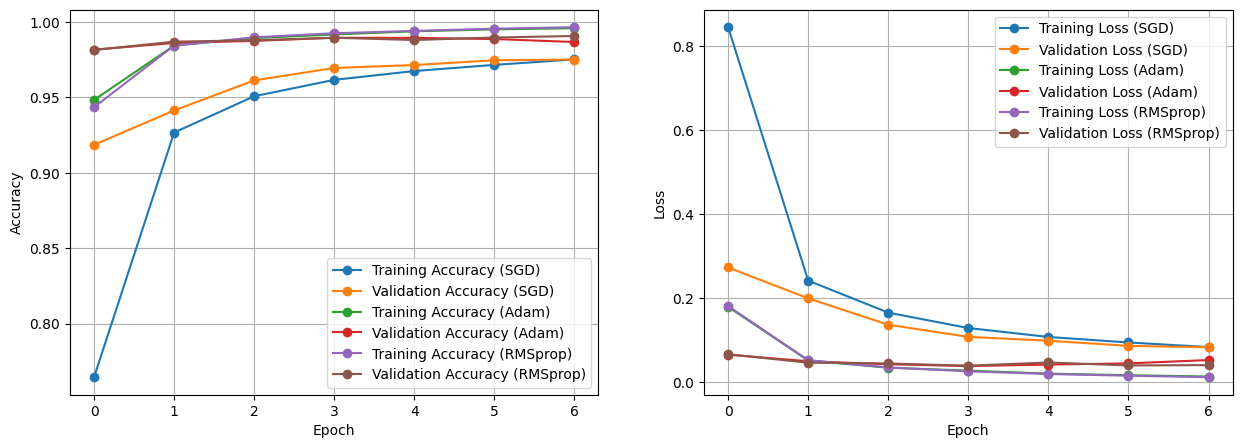

In [16]:
# Plot the comparison of the three optimizers' performance
plt.figure(figsize=(15, 5))

# Plot the accuracy
plt.subplot(1, 2, 1)
plt.plot(history_sgd.history['accuracy'], 'o-', label='Training Accuracy (SGD)')
plt.plot(history_sgd.history['val_accuracy'], 'o-', label='Validation Accuracy (SGD)')
plt.plot(history_adam.history['accuracy'], 'o-', label='Training Accuracy (Adam)')
plt.plot(history_adam.history['val_accuracy'], 'o-', label='Validation Accuracy (Adam)')
plt.plot(history_rmsprop.history['accuracy'], 'o-', label='Training Accuracy (RMSprop)')
plt.plot(history_rmsprop.history['val_accuracy'], 'o-', label='Validation Accuracy (RMSprop)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

# Plot the loss
plt.subplot(1, 2, 2)
plt.plot(history_sgd.history['loss'], 'o-', label='Training Loss (SGD)')
plt.plot(history_sgd.history['val_loss'], 'o-', label='Validation Loss (SGD)')
plt.plot(history_adam.history['loss'], 'o-', label='Training Loss (Adam)')
plt.plot(history_adam.history['val_loss'], 'o-', label='Validation Loss (Adam)')
plt.plot(history_rmsprop.history['loss'], 'o-', label='Training Loss (RMSprop)')
plt.plot(history_rmsprop.history['val_loss'], 'o-', label='Validation Loss (RMSprop)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()
